In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm
from matplotlib import rc
from numpy import inf
import os

from os import listdir


import uproot3


rc('text', usetex=True)

import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=True)
rc('font', size=22)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

#
mpl.rcParams.update({'font.size': 19})
#mpl.rcParams.update({'legend.fontsize': 18})
mpl.rcParams.update({'xtick.labelsize': 18}) 
mpl.rcParams.update({'ytick.labelsize': 18}) 
mpl.rcParams.update({'text.usetex' : False})
mpl.rcParams.update({'axes.labelsize': 18}) 
mpl.rcParams.update({'legend.frameon': False}) 

#import mplhep as hep
#hep.set_style(hep.style.ROOT)
print(pd.__version__)

0.25.3


/home/miguel/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/miguel/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


In [2]:

# Define default plot styles
plot_style_0 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'linestyle': '--',
    'density': True
}

plot_style_1 = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'density': True
}

plot_style_2 = {'alpha': 0.5, 'density': True}

plot_style_1A = {
    'histtype': 'step',
    'color': 'black',
    'linewidth': 2,
    'density': False
}

plot_style_2A = {'alpha': 0.5, 'density': False}

In [3]:

def get_Dataframe(path, name='Data', tag=None):
    Files = listdir(path) 
    #print (Files)
    df = None
    for i, f in enumerate(Files):
        if( df is not None):
            if(df.shape[0]>5000000): continue
        #if(i>10):continue
        if name not in f: continue
        filename = path+f
        if not(tag is None) and (tag not in f): continue
        print ('filename is' , filename)
        
        temp_file = uproot3.open(filename)
        
        hasTree = False 
        
        print (temp_file.keys()) 
        
        if(len(temp_file.keys())<1):
            print('could not find %s, skipping'%name)
            continue
        
        if( not(name in str(temp_file.keys()[0]))):
            print('could not find %s, skipping'%name)
            continue
        
        for key in temp_file[name].keys():
            #print (key)
            if('minitree' in str(key)):
                hasTree=True
        if (not hasTree):
            print('file has not minitree, skipping')
            continue

        temp_tree = temp_file[name+'/minitree']

        
        temp_df = None
        
        if 'Data' not in name:
            try:
                temp_df   =  temp_tree.pandas.df(["jet*", "genjet*","Q2","gen_Q2","y",'gen_y',"e_*","gene*",'wgt','vertex_z','ptmiss','ptratio*','Empz','pth'], entrystop=3e7,flatten=True)
                df = pd.concat([df,temp_df])
            except ValueError:
                print ('oops, there is a problem in flattening the TTree ')
        else:
            try:
                temp_df   =  temp_tree.pandas.df(["jet*","Q2","y","e_*",'wgt','vertex_z','ptmiss','ptratio*','Empz','pth'], entrystop=3e7,flatten=True) 
                df = pd.concat([df,temp_df])
            except ValueError:
                print ('oops, there is a problem in flattening the TTree ')
        
        #try:
        #    df.shape[0]
        #except ValueError:
        #    print('no valid dataframe')
    print('####################################################################')
    if( not(df is None)):
        print('Dataframe has a total of ', df.shape[0], ' entries')
    else:
        print ('Dataframe has no entry, it is None')
    print('####################################################################')

    return df

In [4]:
def applyCut(inputDataframe, cut, text=None):
    dataframe = inputDataframe
    nbeforecut = dataframe.shape[0]
    cutDataframe = dataframe.query(cut)
    if text:
        print (text, cutDataframe.shape[0], ' fraction kept: %2.1f'%(100.0*float(cutDataframe.shape[0])/nbeforecut))
    return cutDataframe

In [5]:
def applyCutsJets(df,isMC=False):
    temp = df

    #temp = applyCut(temp, 'pass_reco==0 | ptmiss < 10', 'ptmiss<10')

    #temp = applyCut(temp, 'pass_reco==0 | 0.08 < y < 0.7', '0.08 < y < 0.7')
    #temp = applyCut(temp, 'pass_reco==0 | Q2>150', 'Q2>150')
    #temp = applyCut(temp, 'pass_reco==0 | Empz<65', 'Empz<65')
    #temp = applyCut(temp, 'pass_reco==0 | Empz>45', 'Empz>45')
    #temp = applyCut(temp, 'pass_reco==0 | jet_pt>5.0', 'jet pT > 5 GeV')
    #temp = applyCut(temp, 'pass_reco==0 | jet_pt<150.0', 'jet pT < 150 GeV')

    #temp = applyCut(temp, 'pass_reco==0 | jet_eta>-1.5', 'jet eta > -1.5')
    #temp = applyCut(temp, 'pass_reco==0 | jet_eta<2.75', 'jet eta < 2.75')

    if(isMC):
        #temp = applyCut(temp,'pass_truth>0',' pass_truth>0')

        temp.eval('gen_logQ2= log(gen_Q2)/2.3025850', inplace=True)   
        temp.eval('gen_Q    = sqrt(gen_Q2)', inplace=True)
        temp.eval('gene_pt = sqrt(gene_px*gene_px + gene_py*gene_py)',inplace=True)
        temp.eval('genjet_px = genjet_pt*cos(genjet_phi)', inplace=True)
        temp.eval('genjet_py = genjet_pt*sin(genjet_phi)', inplace=True)
        temp.eval('genjet_pz = genjet_pt*sinh(genjet_eta)', inplace=True)

        
        temp.eval('genjet_qt = sqrt( (genjet_px + gene_px)**2 + (genjet_py + gene_py)**2) ', inplace=True)
        temp.eval('genjet_qtnorm = genjet_qt/sqrt(gen_Q2)', inplace=True)
        temp.eval('gene_phi = arctan(gene_py/gene_px)', inplace=True)
        temp.eval('genjet_phi = arctan(genjet_py/genjet_px)',inplace=True)
        temp.eval('genjet_dphi = abs(gene_phi-genjet_phi)',inplace=True)
        
        temp.eval('genqt_px = genjet_px + gene_px', inplace=True)
        temp.eval('genqt_py = genjet_py + gene_py', inplace=True)
        temp.eval('genqt_phi = arctan(genqt_py/genqt_px)',inplace=True)
        temp.eval('genqt_dot_ept = (genqt_px*gene_px + genqt_py*gene_py)/(genjet_qt*gene_pt)', inplace=True)
        temp.eval('genqt_dphi = arccos(genqt_dot_ept)', inplace=True)
        temp.eval('genqt_cos2phi = cos(2*genqt_dphi)', inplace=True)

    #    temp.eval('genjet_qtnormept= genjet_qt/e_pt', inplace=True)
    #    temp.eval('genjet_qtnormjetpt= genjet_qt/genjet_pt', inplace=True)


    #df = applyCut(df, 'n_total>1', ' n>1')
    return temp

In [6]:


mcname = 'Rapgap'
#mcname = 'Djangoh'
if(mcname=='Rapgap'):
    name1='Rapgap'
    name2='RaNorad'
    path_nominal = '/home/miguel/data/hera/RapgapQEDcorr/out_em06/'
    path_norad   = '/home/miguel/data/hera/RapgapQEDcorr/out_em_A/'
    
elif(mcname=='Djangoh'):
    name1='Django'
    name2='DjNorad'
    path_nominal = '/home/miguel/data/hera/DjangoQEDcorr/out_em06/'
    path_norad   = '/home/miguel/data/hera/DjangoQEDcorr/out_em_A/'
mc = get_Dataframe(path_nominal, name=name1, tag='nominal')
mc_norad = get_Dataframe(path_norad, name=name2, tag='nominal')


filename is /home/miguel/data/hera/RapgapQEDcorr/out_em06/Rapgap_Eminus06_2.nominal.root
[b'Rapgap;1']
filename is /home/miguel/data/hera/RapgapQEDcorr/out_em06/Rapgap_Eminus06_5.nominal.root
[b'Rapgap;1']
filename is /home/miguel/data/hera/RapgapQEDcorr/out_em06/Rapgap_Eminus06_6.nominal.root
[b'Rapgap;1']
filename is /home/miguel/data/hera/RapgapQEDcorr/out_em06/Rapgap_Eminus06_4.nominal.root
[b'Rapgap;1']
####################################################################
Dataframe has a total of  5737454  entries
####################################################################
filename is /home/miguel/data/hera/RapgapQEDcorr/out_em_A/RaNorad_Eminus06_2.nominal.root
[b'RaNorad;1']
filename is /home/miguel/data/hera/RapgapQEDcorr/out_em_A/RaNorad_Eminus06_4.nominal.root
[b'RaNorad;1']
filename is /home/miguel/data/hera/RapgapQEDcorr/out_em_A/RaNorad_Eminus06_1.nominal.root
[b'RaNorad;1']
filename is /home/miguel/data/hera/RapgapQEDcorr/out_em_A/RaNorad_Eminus06_3.nominal.root
[b

In [7]:
%%time 

print('Selecting MC events\n')
mc   = applyCutsJets(mc, isMC=True)
print('Selecting MC events\n')
mc_norad   = applyCutsJets(mc_norad, isMC=True)

Selecting MC events

Selecting MC events

CPU times: user 3.34 s, sys: 476 ms, total: 3.81 s
Wall time: 1.91 s


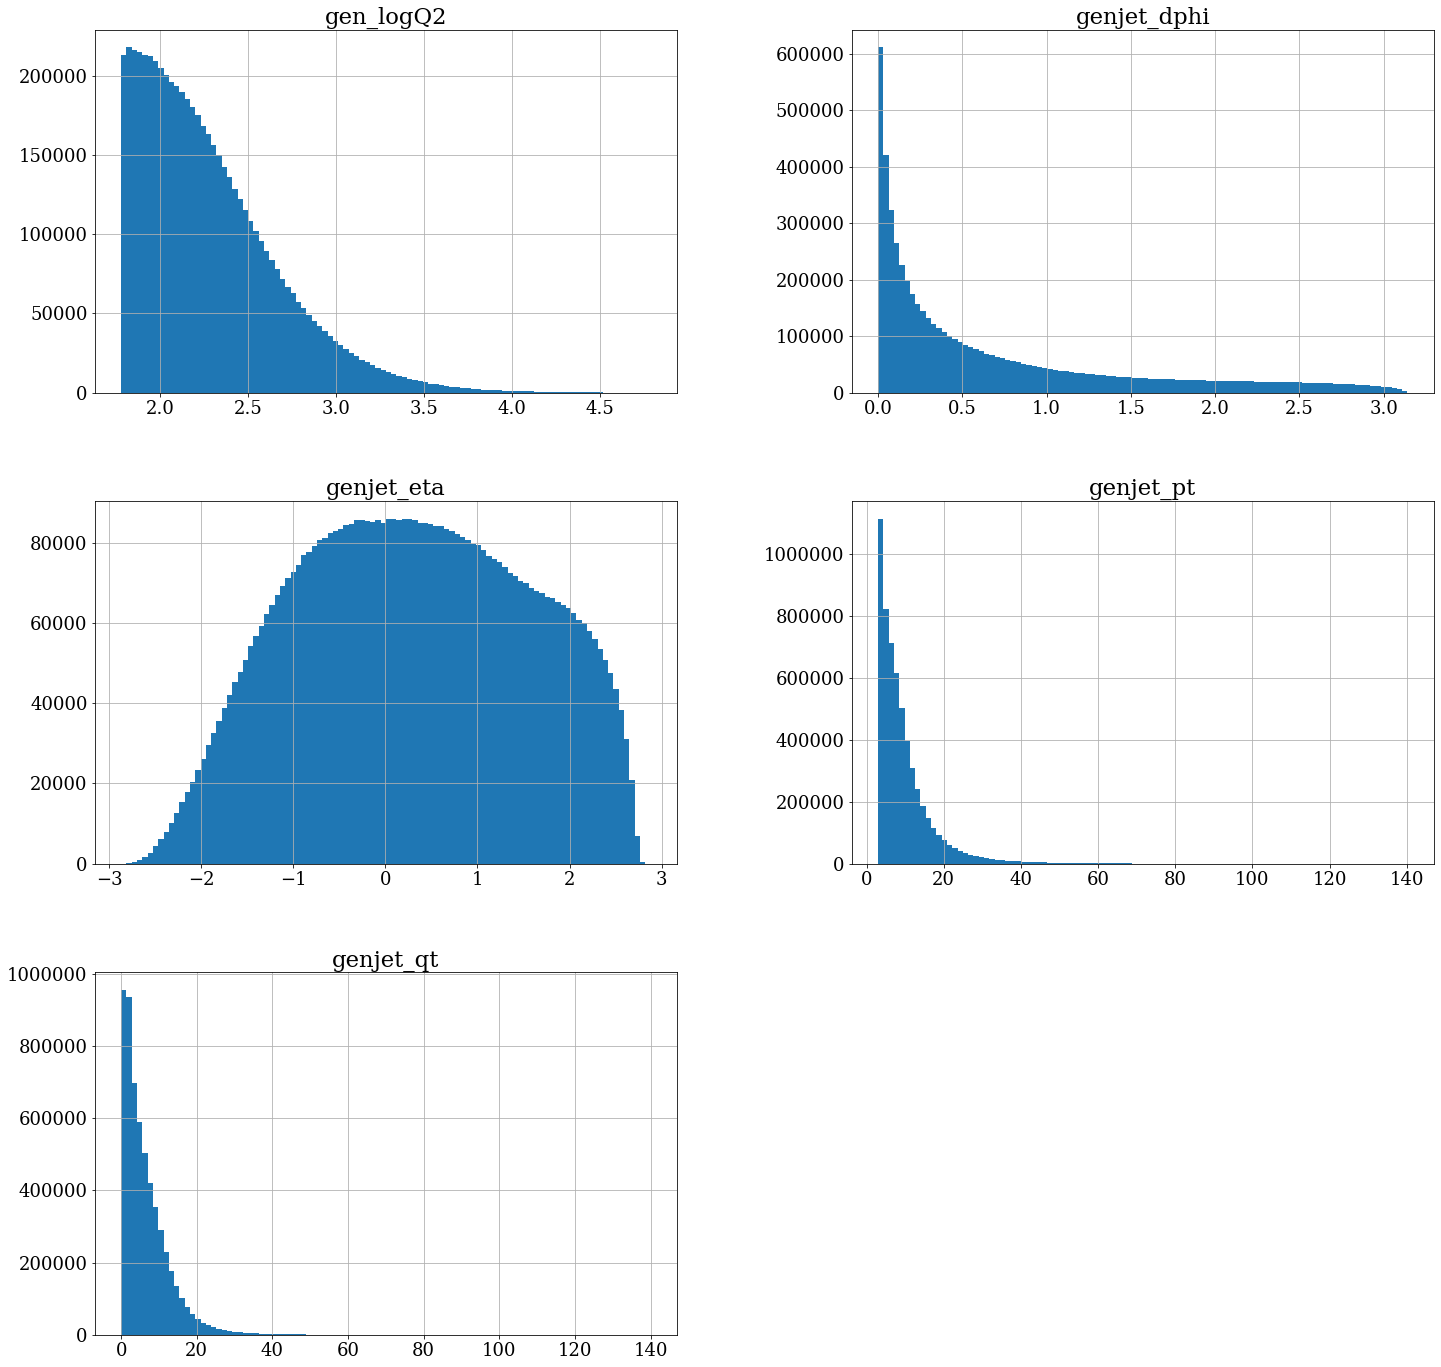

In [8]:
mc.hist(figsize=(24,24),column=['genjet_eta','genjet_pt','genjet_qt','genjet_dphi','gen_logQ2'],bins=100)
plt.show()

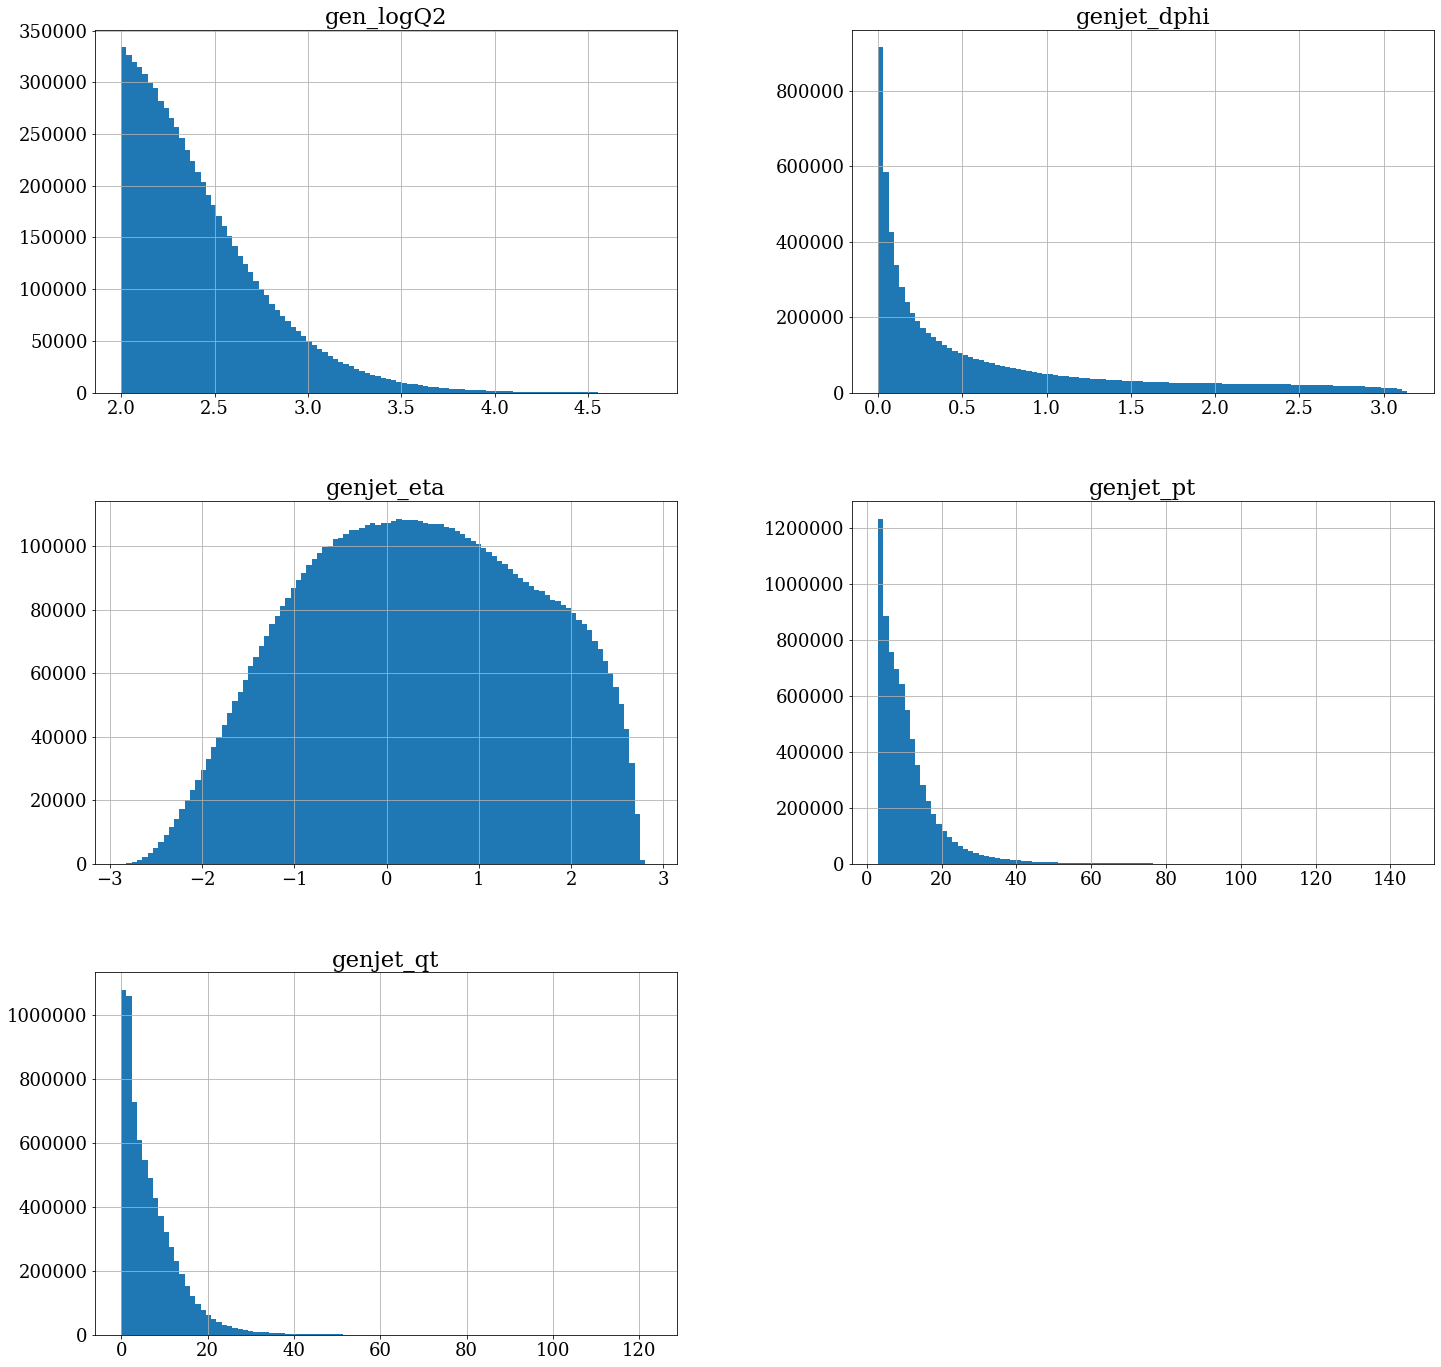

In [9]:
mc_norad.hist(figsize=(24,24),column=['genjet_eta','genjet_pt','genjet_qt','genjet_dphi','gen_logQ2'],bins=100)
plt.show()

In [10]:
fiducialregion = 'gen_Q2>150 and gen_y>0.2 and gen_y<0.7 and genjet_pt>10 and genjet_eta<2.5 and genjet_eta>-1.0'
bins = np.logspace(np.log10(10),np.log10(100),7)
y,x = np.histogram(mc.query(fiducialregion)['genjet_pt'],bins=bins,weights=mc.query(fiducialregion)['wgt'])
total = np.sum(y)
print('Total cross-section is: %f' %total)

y,x = np.histogram(mc_norad.query(fiducialregion)['genjet_pt'],bins=bins,weights=mc_norad.query(fiducialregion)['wgt'])
total_norad = np.sum(y)
print('Total cross-section is: %f' %total_norad)

Total cross-section is: 40898.632812
Total cross-section is: 59299.378906


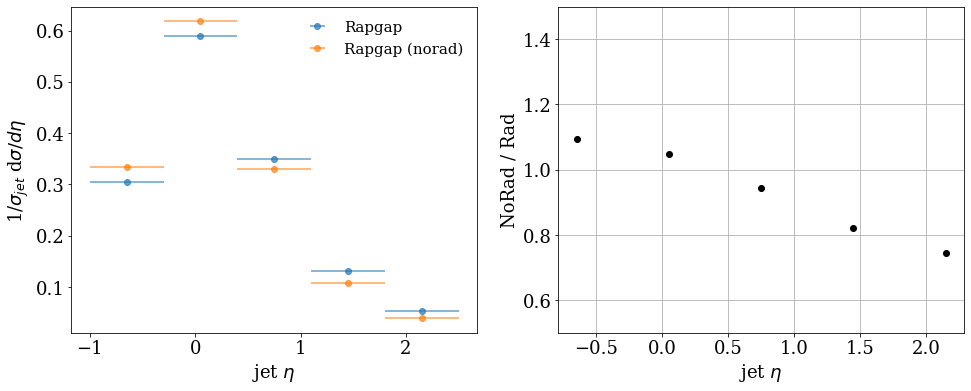

In [11]:
fig,ax = plt.subplots(1,2,figsize=(16, 6))
bins = np.linspace(-1,2.5,6)

y,x = np.histogram(mc.query(fiducialregion)['genjet_eta'],bins=bins,weights=mc.query(fiducialregion)['wgt'])
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
y = y/total
y = y/(xerr*2.0)
ax[0].errorbar(x,y, xerr=xerr, fmt='o',ls='none',label=mcname,alpha=0.7)



y_norad,x = np.histogram(mc_norad.query(fiducialregion)['genjet_eta'],bins=bins,weights=mc_norad.query(fiducialregion)['wgt'])
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
y_norad = y_norad/total_norad
y_norad = y_norad/(xerr*2.0)
ax[0].errorbar(x,y_norad, xerr=xerr, fmt='o',ls='none',label=mcname+' (norad)',alpha=0.7)


ax[0].legend()


ratio = np.true_divide(y_norad,y)
ax[1].plot(x,ratio,'o',color='k')
ax[1].set_ylabel('NoRad / Rad')
ax[1].set_ylim([0.5,1.5])
ax[1].grid()

ax[0].set_xlabel(r'jet $\eta$',fontsize=18)
ax[0].set_ylabel(r'1/$\sigma_{jet}$ d$\sigma/d\eta$ ',fontsize=18)
ax[1].set_xlabel(r'jet $\eta$',fontsize=18)

#plt.yscale('log')
#plt.xscale('log')

correction_eta= ratio.copy()

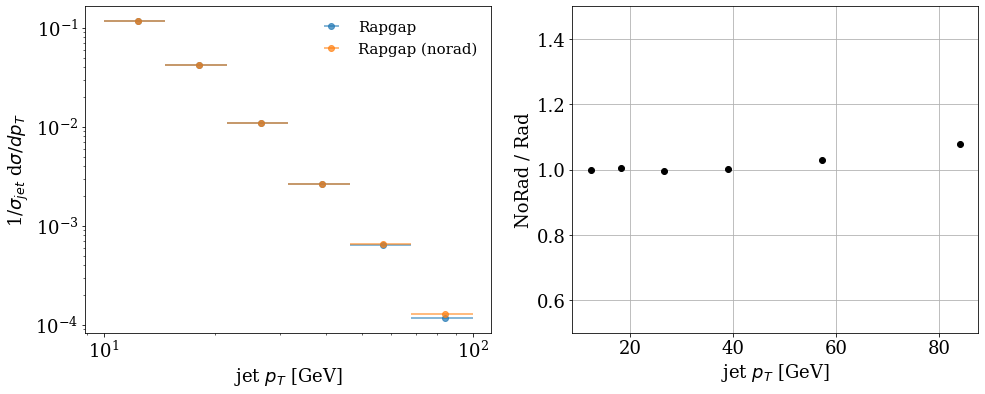

In [12]:
fig,ax = plt.subplots(1,2,figsize=(16, 6))
bins = np.logspace(np.log10(10),np.log10(100),7)

y,x = np.histogram(mc.query(fiducialregion)['genjet_pt'],bins=bins,weights=mc.query(fiducialregion)['wgt'])
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
y = y/total
y = y/(xerr*2.0)
ax[0].errorbar(x,y, xerr=xerr, fmt='o',ls='none',label=mcname,alpha=0.7)



y_norad,x = np.histogram(mc_norad.query(fiducialregion)['genjet_pt'],bins=bins,weights=mc_norad.query(fiducialregion)['wgt'])
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
y_norad = y_norad/total_norad
y_norad = y_norad/(xerr*2.0)
ax[0].errorbar(x,y_norad, xerr=xerr, fmt='o',ls='none',label=mcname+' (norad)',alpha=0.7)


ax[0].legend()


ratio = np.true_divide(y_norad,y)
ax[1].plot(x,ratio,'o',color='k')
ax[1].set_ylabel('NoRad / Rad')
ax[1].set_ylim([0.5,1.5])
ax[1].grid()

ax[0].set_xlabel(r'jet $p_{T}$ [GeV]',fontsize=18)
ax[1].set_xlabel(r'jet $p_{T}$ [GeV]',fontsize=18)
ax[0].set_ylabel(r'1/$\sigma_{jet}$ d$\sigma/dp_{T}$ ',fontsize=18)
ax[0].legend()
ax[0].set_yscale('log')
ax[0].set_xscale('log')

correction_pt= ratio.copy()

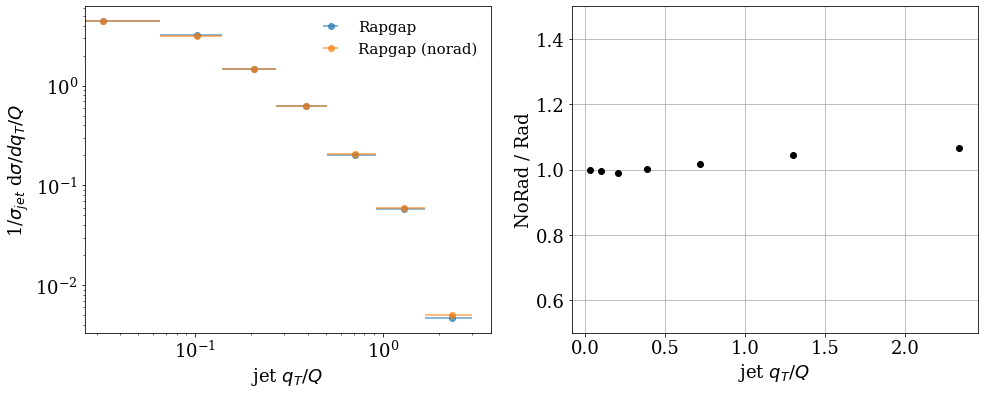

In [13]:
fig,ax = plt.subplots(1,2,figsize=(16, 6))
bins = np.logspace(np.log10(0.03),np.log10(3.03),9) - 0.03
bins = bins[1:]
bins[0] = 0.0
y,x = np.histogram(mc.query(fiducialregion)['genjet_qtnorm'],bins=bins,weights=mc.query(fiducialregion)['wgt'])
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
y = y/total
y = y/(xerr*2.0)
ax[0].errorbar(x,y, xerr=xerr, fmt='o',ls='none',label=mcname,alpha=0.7)



y_norad,x = np.histogram(mc_norad.query(fiducialregion)['genjet_qtnorm'],bins=bins,weights=mc_norad.query(fiducialregion)['wgt'])
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
y_norad = y_norad/total_norad
y_norad = y_norad/(xerr*2.0)
ax[0].errorbar(x,y_norad, xerr=xerr, fmt='o',ls='none',label=mcname+' (norad)',alpha=0.7)


ax[0].legend()


ratio = np.true_divide(y_norad,y)
ax[1].plot(x,ratio,'o',color='k')
ax[1].set_ylabel('NoRad / Rad')
ax[1].set_ylim([0.5,1.5])
ax[1].grid()


ax[0].set_xlabel(r'jet $q_{T}/Q$ ',fontsize=18)
ax[1].set_xlabel(r'jet $q_{T}/Q$ ',fontsize=18)

ax[0].set_ylabel(r'1/$\sigma_{jet}$ d$\sigma/dq_{T}/Q$ ',fontsize=18)
ax[0].legend()
ax[0].set_yscale('log')
ax[0].set_xscale('log')

correction_qt = ratio.copy()

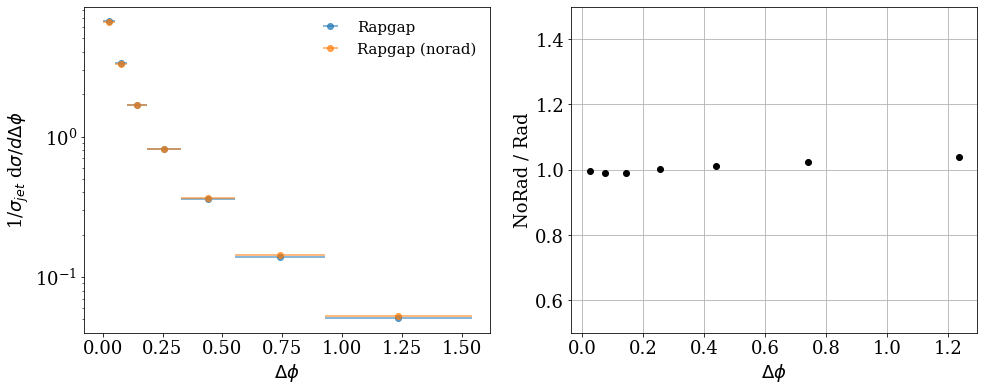

In [14]:
fig,ax = plt.subplots(1,2,figsize=(16, 6))
bins = np.logspace(np.log10(0.03),np.log10(np.pi/2.0),9) - 0.03
bins = bins[1:]
bins[0] = 0.0
y,x = np.histogram(mc.query(fiducialregion)['genjet_dphi'],bins=bins,weights=mc.query(fiducialregion)['wgt'])
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
y = y/total
y = y/(xerr*2.0)
ax[0].errorbar(x,y, xerr=xerr, fmt='o',ls='none',label=mcname,alpha=0.7)



y_norad,x = np.histogram(mc_norad.query(fiducialregion)['genjet_dphi'],bins=bins,weights=mc_norad.query(fiducialregion)['wgt'])
xerr = (x[1:] - x[:-1])/2.0
x = (x[1:]+x[:-1])/2
y_norad = y_norad/total_norad
y_norad = y_norad/(xerr*2.0)
ax[0].errorbar(x,y_norad, xerr=xerr, fmt='o',ls='none',label=mcname+' (norad)',alpha=0.7)


ax[0].legend()


ratio = np.true_divide(y_norad,y)
ax[1].plot(x,ratio,'o',color='k')
ax[1].set_ylabel('NoRad / Rad')
ax[1].set_ylim([0.5,1.5])
ax[1].grid()


ax[0].set_xlabel(r'$\Delta\phi$ ',fontsize=18)
ax[1].set_xlabel(r'$\Delta\phi$ ',fontsize=18)

ax[0].set_ylabel(r'1/$\sigma_{jet}$ d$\sigma/d\Delta\phi$ ',fontsize=18)
ax[0].legend()
ax[0].set_yscale('log')

correction_dphi = ratio.copy()

In [17]:
print(correction_pt)
print(correction_eta)
print(correction_qt)
print(correction_dphi)



[0.99800443 1.00344233 0.99424798 1.00068897 1.02939653 1.0792489 ]
[1.09571656 1.04828627 0.94267149 0.82129598 0.7447465 ]
[0.99743385 0.99422542 0.99071551 1.00213674 1.0176116  1.0457787
 1.06614549]
[0.99608964 0.98909563 0.98894485 1.00198912 1.01275568 1.02305674
 1.03865277]


In [16]:

with open('outputfiles/QEDCorrections_%s.npy'%(mcname) , 'wb') as f:
    np.save(f, correction_pt)
    np.save(f, correction_eta)
    np.save(f, correction_qt)
    np.save(f,correction_dphi)